In [1]:
import pandas as pd 

In [2]:
%pylab inline
# import matplotlib.pyplot as plt et numpy as np

Populating the interactive namespace from numpy and matplotlib


In [3]:
from functions import *

In [4]:
#Lecture des données 
data = pd.read_csv("C:/Users/Utilisateur/projet 5/données projet 5/data_p5.csv")
#donnees_clustering.reset_index()
data.head()

code_pays            Zone  production  ratio_poidsprot/poids_total  \
0          2     Afghanistan        29.0                     0.194344   
1        202  Afrique du Sud      1762.0                     0.427048   
2          3         Albanie        16.0                     0.533523   
3          4         Algérie       295.0                     0.269302   
4         79       Allemagne      1571.0                     0.607495   

   disp_alim_cal/personne  disp_prot_kg/personne  Evolution_demographique  \
0                  2040.0                  55.52                 2.413489   
1                  2899.0                  84.37                 1.373443   
2                  3360.0                 115.74                -0.034674   
3                  3322.0                  91.83                 2.027109   
4                  3554.0                 105.40                 0.563769   

   pib_2018  exportation_produits_français  exportation_volaille  \
0  1.189228                            0.0                   0.0   
1  0.787056                          295.0                  48.0   
2  4.071301                           99.0                   0.0   
3  1.200000                            0.0                   0.0   
4  1.267995                        23538.0                 640.0   

   importation_vers_france  importation_volaille  disponibilité_volaille  \
0                      0.0                  25.0                    1.43   
1                      0.0                 515.0                   38.57   
2                      0.0                  12.0                    9.48   
3                      0.0                   0.0                    6.98   
4                  32509.0                 871.0                   18.15   

   distance_avec_france  stabilite_politique  reseau_ferroviaire iso3  
0                  5586                -2.75                 0.0  AFG  
1                  8688                -0.22                 0.0  ZAF  
2                  1600                 0.38                 0.0  ALB  
3                  1340                -0.83                 0.2  DZA  
4                   882                 0.60                 9.4  DEU

In [5]:
colonnes = ['ratio_poidsprot/poids_total',
                                   'disp_alim_cal/personne','disp_prot_kg/personne',
                                   'Evolution_demographique', 'production','pib_2018',
                                  'exportation_produits_français',
                                  'exportation_volaille', 'importation_vers_france',
                                   'importation_volaille', 'disponibilité_volaille',
                                   'distance_avec_france', 'stabilite_politique',
                                   'reseau_ferroviaire',
                                   ]
my_data = data[colonnes]
names = data["Zone"].values
features = my_data.columns # les variables 

In [6]:
#On va convertir notre tableau pour regarder la forme de X en un tableau numpy
X = my_data.values
print (X.shape)

(170, 14)


In [7]:
# On va standardiser les données 
from sklearn import preprocessing

In [8]:
std_scale = preprocessing.StandardScaler().fit(X)

In [9]:
#Calcul des données standardisées
X_scaled = std_scale.transform(X)

In [10]:
# on va faire l'acp

In [11]:
from sklearn import decomposition

In [12]:
n_comp = 4

In [13]:
pca = decomposition.PCA(n_components = n_comp)

In [14]:
#On applique l'objet pca à mes données normalisées
pca.fit(X_scaled)

PCA(n_components=4)

In [15]:
print(pca.explained_variance_ratio_)

[0.2916948  0.13647285 0.12848406 0.08712338]


In [16]:
#On veut savoir quel %  de variance elles expliquent ensemble
print(pca.explained_variance_ratio_.cumsum())

[0.2916948  0.42816765 0.55665171 0.64377509]


In [17]:
X_projected = pca.transform(X_scaled)
print(X_projected.shape)

(170, 4)


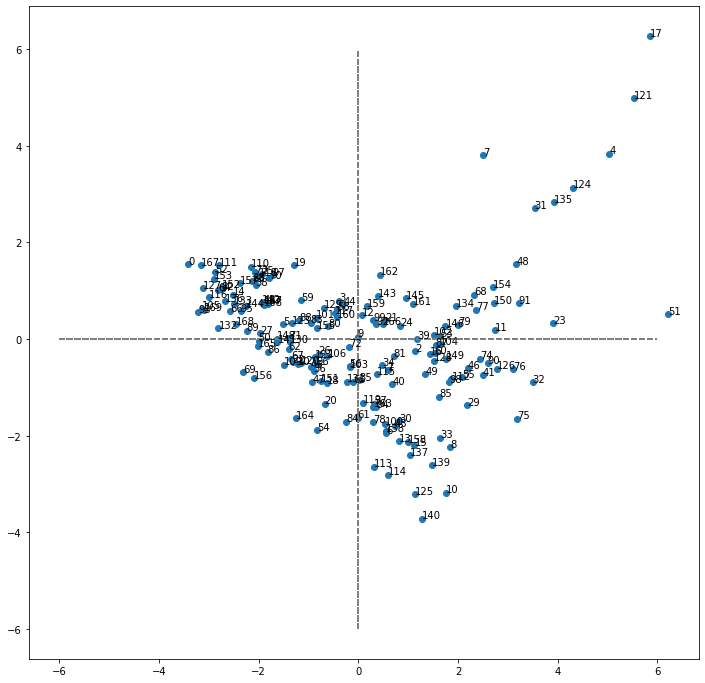

In [18]:
plt.figure(figsize = (12,12))
plt.scatter(X_projected[:,0], X_projected[:,1])

for i, (x,y) in enumerate(zip(X_projected[:,0],
                         X_projected[:,1])):
    # affichage des lignes horizontales et verticales
    plt.plot([-6, 6], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-6, 6], color='grey', ls='--')
    
    plt.text(x,y,my_data.index[i])
    

In [19]:
#Les coordonnées de mes composantes principales sont dans l'attribut pcs.
#se sont les coefficients de corrélation de chaque colonne
pcs = pca.components_


(-0.5, 0.5)

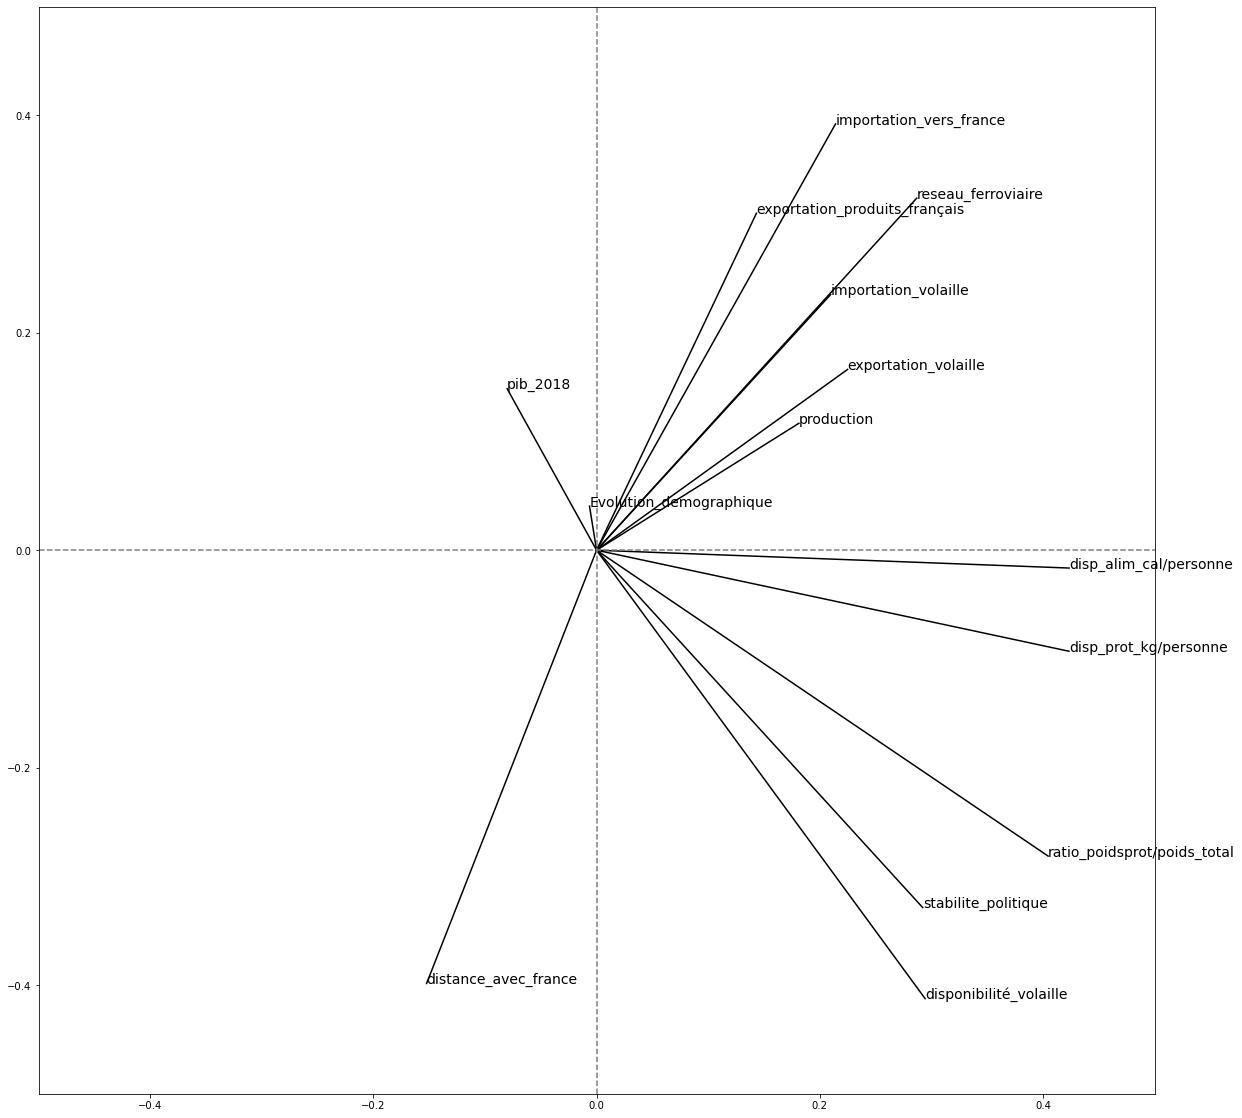

In [20]:
pcs = pca.components_
plt.figure(figsize = (20,20))
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, my_data.columns[i], fontsize='14')

# Afficher une ligne horizontale y=0
plt.plot([-0.5, 0.5], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.5, 0.5], color='grey', ls='--')

plt.xlim([-0.5, 0.5])
plt.ylim([-0.5, 0.5])

### Nous allons tracer le cercle de corrélation 

In [21]:
#Pour cela nous allons déterminer le nombre de cluster maximum en utilisant la méthode du coude 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


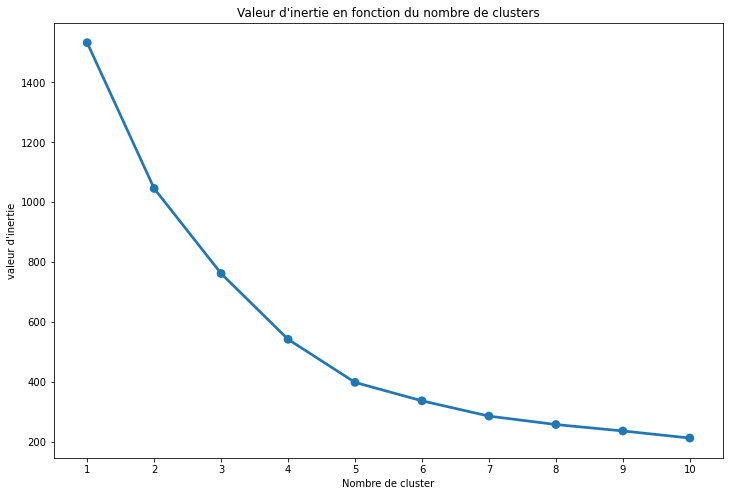

In [22]:
from sklearn.cluster import KMeans
#Calcul du nombre optimal de cluster, on crée donc une liste de 10 clusters
clusters_kmeans = [1,2,3,4,5,6,7,8,9,10]
# on crée une liste vide dans laquelle nous allons mettre les centres d'inertie
inertia_values = []
for clusters  in clusters_kmeans:
    Kmeans = KMeans(n_clusters = clusters)
    Kmeans.fit(X_projected)
    inertia_values.append(Kmeans.inertia_)
    
# on trace la courbe qui permet de donner le nombre de clusters max
plt.figure(figsize = (12,8))
import seaborn as sns
sns.pointplot(x=clusters_kmeans, y = inertia_values )
plt.title("Valeur d'inertie en fonction du nombre de clusters")
plt.xlabel("Nombre de cluster")
plt.ylabel("valeur d'inertie")
plt.show()


In [23]:
# Nombre de clusters maximal
nombre_clusters = 3
# Nous allons définir les clusters
list_cluster = {"1": "C 1", "2": "C 2", "3": "C 3"}
# Nous allons attibuer une couleur à chaque clusters
colors=["darkorange", "magenta", "cyan"]

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
cmap= ListedColormap(colors)


In [24]:
from scipy.cluster.hierarchy import dendrogram,linkage, fcluster
# Générer la matrice des liens
z0 = linkage(X_scaled, method ='ward', metric = 'euclidean')
cluster_pca = fcluster(z0, 3, criterion = 'maxclust')
data["cluster"] = cluster_pca 
cluster_pca

array([1, 3, 3, 1, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 3, 1, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1,
       1, 1, 3, 1, 3, 3, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1], dtype=int32)

## Calcul des centroïdes 

In [25]:
donnees_centroids = data.groupby("cluster").mean()
x_centroids =std_scale.transform(donnees_centroids[colonnes].values) 
# on crée la varaible x_cluster qui contient les noms des centroïdes 
X_cluster = np.array(list(list_cluster.values()))
# Nous pouvons ainsi afficher le dataframe centroïdes
donnees_centroids[colonnes].reset_index()

cluster  ratio_poidsprot/poids_total  disp_alim_cal/personne  \
0        1                     0.373659             2692.184000   
1        2                     0.535169             3424.666667   
2        3                     0.577208             3353.642857   

   disp_prot_kg/personne  Evolution_demographique    production  pib_2018  \
0              73.232480                 1.214306    340.144000  3.341613   
1             103.350000                 0.743092  18771.333333  3.664775   
2             105.708571                 1.289703    600.880952  3.106576   

   exportation_produits_français  exportation_volaille  \
0                     448.496000             20.424000   
1                      27.333333           2999.000000   
2                    5117.142857            159.571429   

   importation_vers_france  importation_volaille  disponibilité_volaille  \
0                 1.224000                36.448               17.975120   
1                12.000000               566.000               39.303333   
2              9126.833333               234.000               25.800238   

   distance_avec_france  stabilite_politique  reseau_ferroviaire  
0           7091.136000            -0.282720            0.350400  
1           7711.333333             0.026667            0.733333  
2           2810.238095             0.603571            3.600000

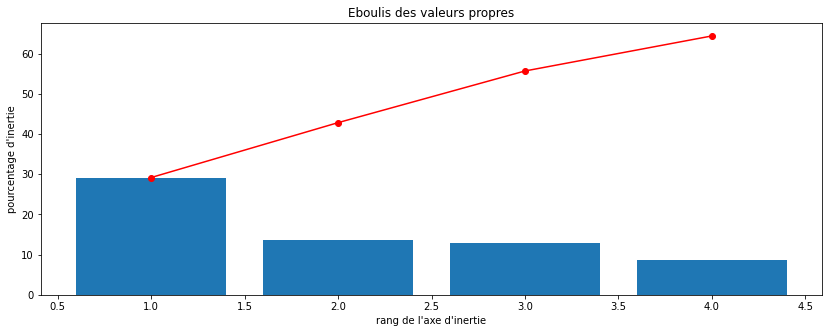

In [26]:
# Eboulis des valeurs propres
display_scree_plot(pca)

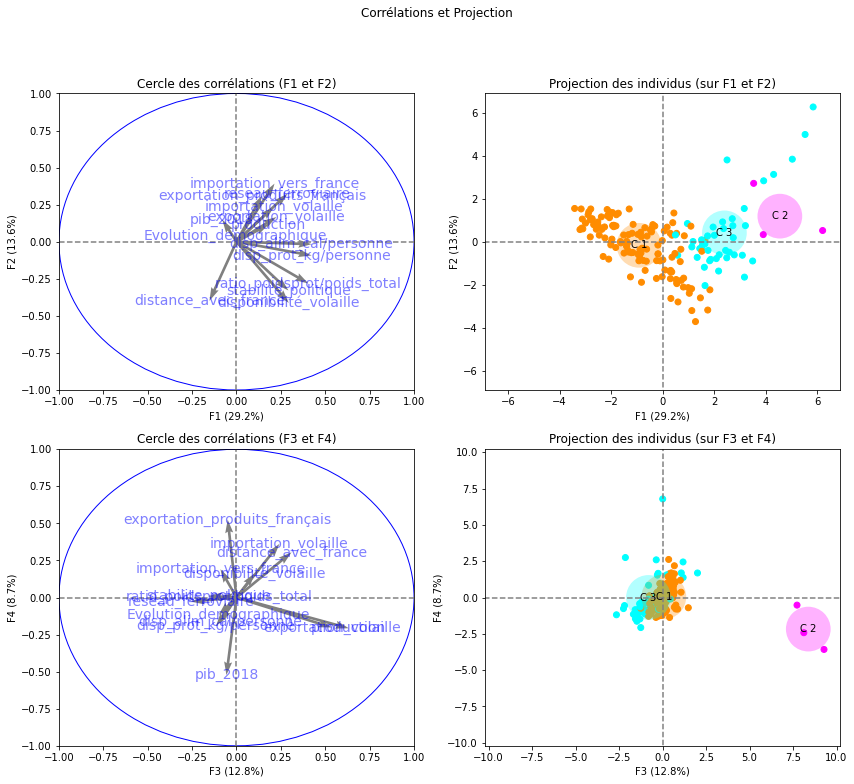

In [27]:

display_factorial_plane_circle(pca=pca,n_comp=n_comp,centroids=x_centroids, labels_=cluster_pca ,axis_rank=[(0,1),(2,3)],labels = np.array(features),X= X_scaled, colors=colors,cmap=cmap, X_clusters=np.array(list(list_cluster.values())).flatten())

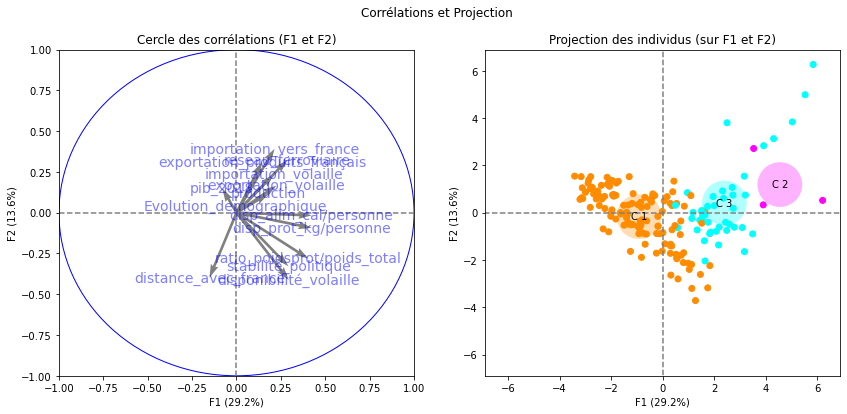

In [28]:

display_factorial_plane_circle(pca=pca,n_comp=2,centroids=x_centroids, labels_=cluster_pca ,axis_rank=[(0,1)],labels = np.array(features),X= X_scaled, colors=colors,cmap=cmap, X_clusters=np.array(list(list_cluster.values())).flatten())

In [29]:
data[data["cluster"] ==5]

Empty DataFrame
Columns: [code_pays, Zone, production, ratio_poidsprot/poids_total, disp_alim_cal/personne, disp_prot_kg/personne, Evolution_demographique, pib_2018, exportation_produits_français, exportation_volaille, importation_vers_france, importation_volaille, disponibilité_volaille, distance_avec_france, stabilite_politique, reseau_ferroviaire, iso3, cluster]
Index: []

In [30]:
data[data["cluster"] == 3]

code_pays                                               Zone  production  \
1          202                                     Afrique du Sud      1762.0   
2            3                                            Albanie        16.0   
4           79                                          Allemagne      1571.0   
7          194                                    Arabie saoudite       554.0   
11          11                                           Autriche       152.0   
16          57                                            Bélarus       466.0   
17         255                                           Belgique       470.0   
29          33                                             Canada      1474.0   
32          96                           Chine - RAS de Hong-Kong        25.0   
33         128                               Chine - RAS de Macao         4.0   
39          98                                            Croatie        64.0   
41          54                                           Danemark       156.0   
46         225                                Emirats arabes unis        48.0   
48         203                                            Espagne      1622.0   
49          63                                            Estonie        19.0   
55          67                                           Finlande       135.0   
60          84                                              Grèce       246.0   
68          97                                            Hongrie       524.0   
74         104                                            Irlande       150.0   
75          99                                            Islande         9.0   
76         105                                             Israël       656.0   
77         106                                             Italie      1277.0   
79         110                                              Japon      2250.0   
85         118                                             Koweït        61.0   
87         119                                           Lettonie        34.0   
90         126                                           Lituanie       134.0   
91         256                                         Luxembourg         0.0   
98         134                                              Malte         4.0   
102        138                                            Mexique      3377.0   
104        273                                         Monténégro         4.0   
112        162                                            Norvège        98.0   
121        150                                           Pays-Bas      1074.0   
124        173                                            Pologne      2509.0   
126        174                                           Portugal       353.0   
134        183                                           Roumanie       480.0   
135        229  Royaume-Uni de Grande-Bretagne et d'Irlande du...      1939.0   
145        199                                          Slovaquie        77.0   
146        198                                           Slovénie        69.0   
149        210                                              Suède       161.0   
150        211                                             Suisse        97.0   
154        167                                           Tchéquie       169.0   
166        237                                           Viet Nam       947.0   

     ratio_poidsprot/poids_total  disp_alim_cal/personne  \
1                       0.427048                  2899.0   
2                       0.533523                  3360.0   
4                       0.607495                  3554.0   
7                       0.376582                  3307.0   
11                      0.603281                  3695.0   
16                      0.567700                  3270.0   
17                      0.586563                  3769.0   
29                      0.545044         

In [31]:
f4 = data[data["cluster"] == 4]
f4

Empty DataFrame
Columns: [code_pays, Zone, production, ratio_poidsprot/poids_total, disp_alim_cal/personne, disp_prot_kg/personne, Evolution_demographique, pib_2018, exportation_produits_français, exportation_volaille, importation_vers_france, importation_volaille, disponibilité_volaille, distance_avec_france, stabilite_politique, reseau_ferroviaire, iso3, cluster]
Index: []

In [32]:
f4[f4["iso3"] =="SVK"]

Empty DataFrame
Columns: [code_pays, Zone, production, ratio_poidsprot/poids_total, disp_alim_cal/personne, disp_prot_kg/personne, Evolution_demographique, pib_2018, exportation_produits_français, exportation_volaille, importation_vers_france, importation_volaille, disponibilité_volaille, distance_avec_france, stabilite_politique, reseau_ferroviaire, iso3, cluster]
Index: []

In [33]:
f2 = data[data["cluster"] == 3]
f2

code_pays                                               Zone  production  \
1          202                                     Afrique du Sud      1762.0   
2            3                                            Albanie        16.0   
4           79                                          Allemagne      1571.0   
7          194                                    Arabie saoudite       554.0   
11          11                                           Autriche       152.0   
16          57                                            Bélarus       466.0   
17         255                                           Belgique       470.0   
29          33                                             Canada      1474.0   
32          96                           Chine - RAS de Hong-Kong        25.0   
33         128                               Chine - RAS de Macao         4.0   
39          98                                            Croatie        64.0   
41          54                                           Danemark       156.0   
46         225                                Emirats arabes unis        48.0   
48         203                                            Espagne      1622.0   
49          63                                            Estonie        19.0   
55          67                                           Finlande       135.0   
60          84                                              Grèce       246.0   
68          97                                            Hongrie       524.0   
74         104                                            Irlande       150.0   
75          99                                            Islande         9.0   
76         105                                             Israël       656.0   
77         106                                             Italie      1277.0   
79         110                                              Japon      2250.0   
85         118                                             Koweït        61.0   
87         119                                           Lettonie        34.0   
90         126                                           Lituanie       134.0   
91         256                                         Luxembourg         0.0   
98         134                                              Malte         4.0   
102        138                                            Mexique      3377.0   
104        273                                         Monténégro         4.0   
112        162                                            Norvège        98.0   
121        150                                           Pays-Bas      1074.0   
124        173                                            Pologne      2509.0   
126        174                                           Portugal       353.0   
134        183                                           Roumanie       480.0   
135        229  Royaume-Uni de Grande-Bretagne et d'Irlande du...      1939.0   
145        199                                          Slovaquie        77.0   
146        198                                           Slovénie        69.0   
149        210                                              Suède       161.0   
150        211                                             Suisse        97.0   
154        167                                           Tchéquie       169.0   
166        237                                           Viet Nam       947.0   

     ratio_poidsprot/poids_total  disp_alim_cal/personne  \
1                       0.427048                  2899.0   
2                       0.533523                  3360.0   
4                       0.607495                  3554.0   
7                       0.376582                  3307.0   
11                      0.603281                  3695.0   
16                      0.567700                  3270.0   
17                      0.586563                  3769.0   
29                      0.545044         

In [34]:
f1 = data[data["cluster"] == 1]
f1.head()

code_pays                Zone  production  ratio_poidsprot/poids_total  \
0          2         Afghanistan        29.0                     0.194344   
3          4             Algérie       295.0                     0.269302   
5          7              Angola        27.0                     0.307446   
6          8  Antigua-et-Barbuda         0.0                     0.645218   
8          9           Argentine      2115.0                     0.646717   

   disp_alim_cal/personne  disp_prot_kg/personne  Evolution_demographique  \
0                  2040.0                  55.52                 2.413489   
3                  3322.0                  91.83                 2.027109   
5                  2385.0                  53.05                 3.330315   
6                  2445.0                  80.19                 1.052632   
8                  3307.0                 106.77                 0.965018   

   pib_2018  exportation_produits_français  exportation_volaille  \
0  1.189228                            0.0                   0.0   
3  1.200000                            0.0                   0.0   
5 -2.003630                          554.0                   0.0   
6  7.389197                            0.0                   0.0   
8 -2.565352                            0.0                 165.0   

   importation_vers_france  importation_volaille  disponibilité_volaille  \
0                      0.0                  25.0                    1.43   
3                      0.0                   0.0                    6.98   
5                      0.0                 335.0                   11.76   
6                      0.0                   7.0                   57.64   
8                     27.0                  13.0                   44.25   

   distance_avec_france  stabilite_politique  reseau_ferroviaire iso3  cluster  
0                  5586                -2.75                 0.0  AFG        1  
3                  1340                -0.83                 0.2  DZA        1  
5                  6505                -0.32                 0.0  AGO        1  
6                  6713                 0.85                 0.0  ATG        1  
8                 11058                 0.02                 0.6  ARG        1

In [35]:
import plotly.express as px
fig = px.choropleth(f2, locations="iso3",
                    color="exportation_produits_français", # lifeExp is a column of gapminder
                    hover_name="Zone", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Rainbow)
fig.show()

## Choix des pays 

 ## CLUSTERING HIERARCHIQUE: CLASSIFICATION ASCENDANTE HIÉRARCHIQUE (CAH): DENDROGRAMME

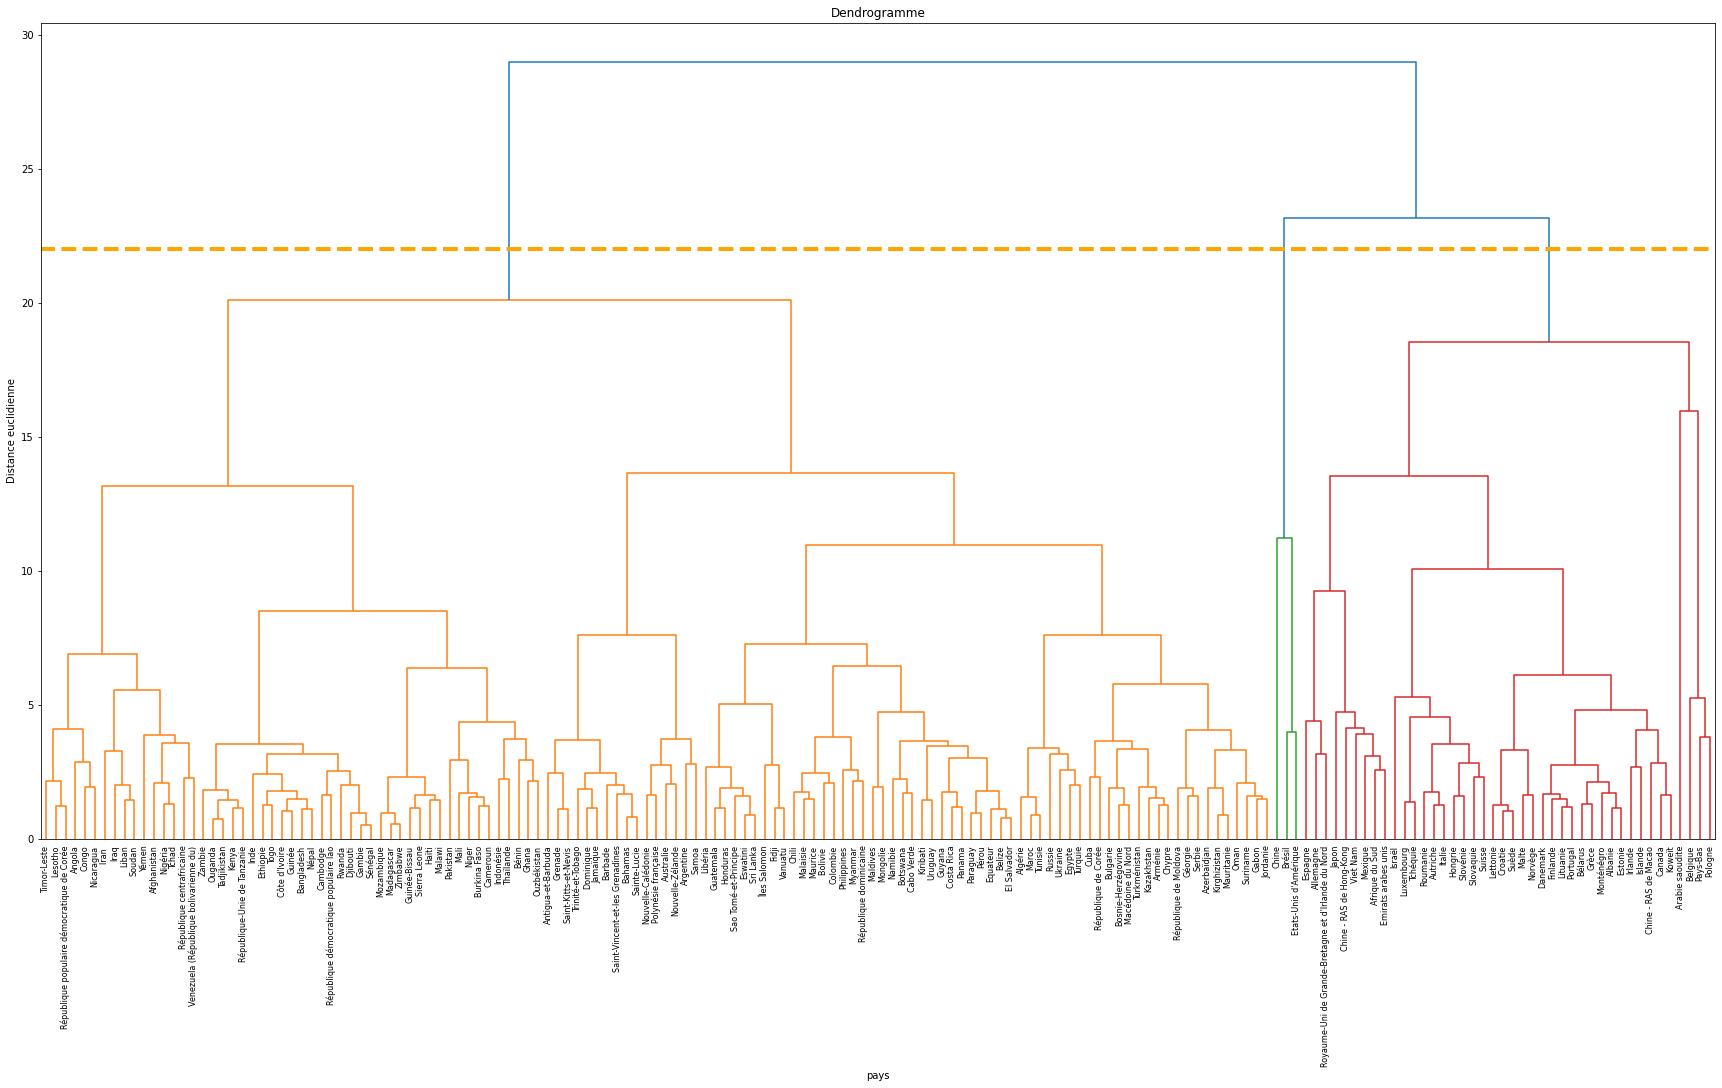

In [36]:
plt.figure(figsize = (30,15))
dendrogram(z0, leaf_rotation = 90, leaf_font_size = 8, labels=names)
plt.title("Dendrogramme")
plt.xlabel('pays')
plt.ylabel("Distance euclidienne")
# Afficher une ligne horizontale y=0
plt.plot([-22, 3000], [22, 22], color='orange', lw = 4, ls='--')
plt.show()

In [37]:
# Nombre de clusters maximal
nombre_clusters2 = 3
# Nous allons définir les clusters
list_cluster2 = {"1": "C 1", "2": "C 2", "3": "C 3"}
# Nous allons attibuer une couleur à chaque clusters
colors2=["darkorange", "magenta", "cyan"]

In [38]:
cluster_pca2 = fcluster(z0, 3, criterion = 'maxclust')
data["cluster2"] = cluster_pca2 
cluster_pca2

array([1, 3, 3, 1, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 3, 1, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1,
       1, 1, 3, 1, 3, 3, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1], dtype=int32)

## Sélection des pays 

In [54]:
field = ["code_pays", "Zone", "cluster"]
list_pays = data[field]
list_pays

code_pays                                    Zone  cluster
0            2                             Afghanistan        1
1          202                          Afrique du Sud        3
2            3                                 Albanie        3
3            4                                 Algérie        1
4           79                               Allemagne        3
..         ...                                     ...      ...
165        236  Venezuela (République bolivarienne du)        1
166        237                                Viet Nam        3
167        249                                   Yémen        1
168        251                                  Zambie        1
169        181                                Zimbabwe        1

[170 rows x 3 columns]

In [55]:
list_pays.to_csv("liste_pays_dendrogramme.csv", index=False)

In [60]:
list_pays_cluster3 = list_pays[list_pays["cluster"] ==3]

In [61]:
list_pays_cluster3.to_csv("liste_pays_cluster3.csv", index=False)

## Calcul des centroïdes 2

In [62]:
donnees_centroids2.to_csv("donnees_centroïdes.csv", index = False)

In [39]:
donnees_centroids2 = data.groupby("cluster2").mean()
x_centroids2 =std_scale.transform(donnees_centroids2[colonnes].values) 
# on crée la varaible x_cluster qui contient les noms des centroïdes 
X_cluster2 = np.array(list(list_cluster2.values()))
# Nous pouvons ainsi afficher le dataframe centroïdes
donnees_centroids2[colonnes].reset_index()

cluster2  ratio_poidsprot/poids_total  disp_alim_cal/personne  \
0         1                     0.373659             2692.184000   
1         2                     0.535169             3424.666667   
2         3                     0.577208             3353.642857   

   disp_prot_kg/personne  Evolution_demographique    production  pib_2018  \
0              73.232480                 1.214306    340.144000  3.341613   
1             103.350000                 0.743092  18771.333333  3.664775   
2             105.708571                 1.289703    600.880952  3.106576   

   exportation_produits_français  exportation_volaille  \
0                     448.496000             20.424000   
1                      27.333333           2999.000000   
2                    5117.142857            159.571429   

   importation_vers_france  importation_volaille  disponibilité_volaille  \
0                 1.224000                36.448               17.975120   
1                12.000000               566.000               39.303333   
2              9126.833333               234.000               25.800238   

   distance_avec_france  stabilite_politique  reseau_ferroviaire  
0           7091.136000            -0.282720            0.350400  
1           7711.333333             0.026667            0.733333  
2           2810.238095             0.603571            3.600000

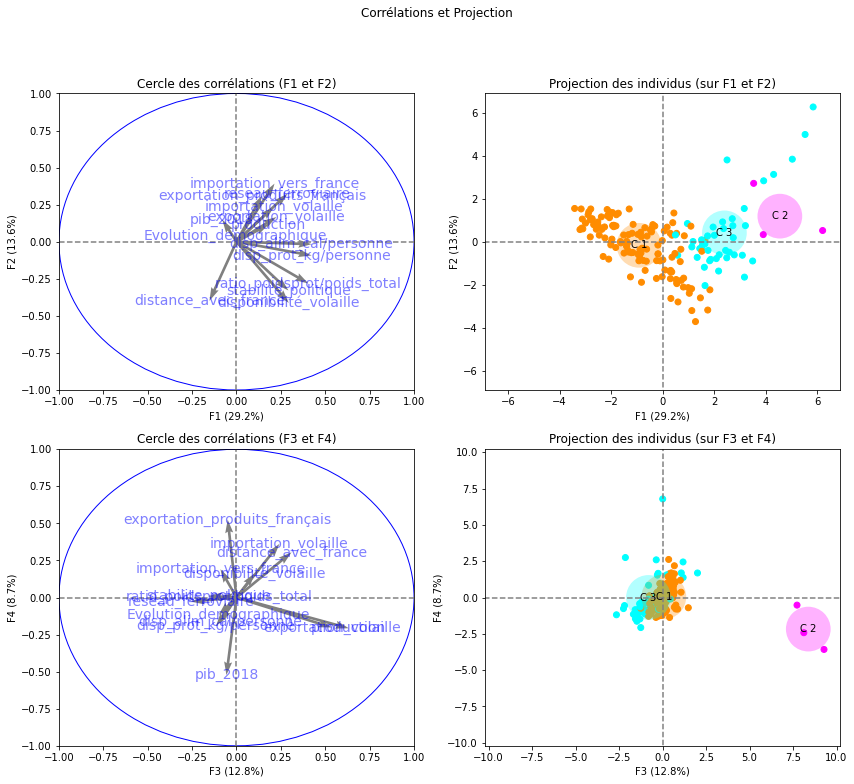

In [40]:
display_factorial_plane_circle(pca=pca,n_comp=n_comp,centroids=x_centroids2, labels_=cluster_pca2 ,axis_rank=[(0,1),(2,3)],labels = np.array(features),X= X_scaled, colors=colors,cmap=cmap, X_clusters=np.array(list(list_cluster2.values())).flatten())

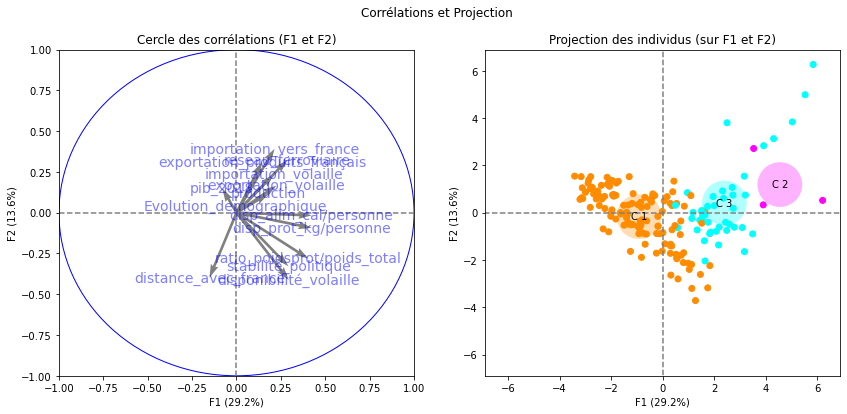

In [41]:
display_factorial_plane_circle(pca=pca,n_comp=2,centroids=x_centroids2, labels_=cluster_pca2 ,axis_rank=[(0,1)],labels = np.array(features),X= X_scaled, colors=colors,cmap=cmap, X_clusters=np.array(list(list_cluster2.values())).flatten())

In [42]:
# Le Cluster 2 se sont les plus grands producteurs de volailles
fd2 = data[data["cluster2"] == 2]
fd2 

code_pays                   Zone  production  ratio_poidsprot/poids_total  \
23         21                 Brésil     13938.0                     0.561977   
31        351                  Chine     20078.0                     0.397496   
51        231  Etats-Unis d'Amérique     22298.0                     0.646035   

    disp_alim_cal/personne  disp_prot_kg/personne  Evolution_demographique  \
23                  3301.0                  95.68                 0.786686   
31                  3191.0                 100.63                 0.464813   
51                  3782.0                 113.74                 0.977778   

    pib_2018  exportation_produits_français  exportation_volaille  \
23  1.317224                            0.0                4012.0   
31  6.749774                            0.0                1209.0   
51  2.927326                           82.0                3776.0   

    importation_vers_france  importation_volaille  disponibilité_volaille  \
23                     36.0                   3.0                   47.05   
31                      0.0                1567.0                   14.22   
51                      0.0                 128.0                   56.64   

    distance_avec_france  stabilite_politique  reseau_ferroviaire iso3  \
23                  8732                -0.39                 0.0  BRA   
31                  8229                 0.00                 0.7  CHN   
51                  6173                 0.47                 1.5  USA   

    cluster  cluster2  
23        2         2  
31        2         2  
51        2         2

In [43]:
#Les pays potentiels dans lesquels on peut exporter les poulets
fd3 = data[data["cluster2"] == 3]
fd3 

code_pays                                               Zone  production  \
1          202                                     Afrique du Sud      1762.0   
2            3                                            Albanie        16.0   
4           79                                          Allemagne      1571.0   
7          194                                    Arabie saoudite       554.0   
11          11                                           Autriche       152.0   
16          57                                            Bélarus       466.0   
17         255                                           Belgique       470.0   
29          33                                             Canada      1474.0   
32          96                           Chine - RAS de Hong-Kong        25.0   
33         128                               Chine - RAS de Macao         4.0   
39          98                                            Croatie        64.0   
41          54                                           Danemark       156.0   
46         225                                Emirats arabes unis        48.0   
48         203                                            Espagne      1622.0   
49          63                                            Estonie        19.0   
55          67                                           Finlande       135.0   
60          84                                              Grèce       246.0   
68          97                                            Hongrie       524.0   
74         104                                            Irlande       150.0   
75          99                                            Islande         9.0   
76         105                                             Israël       656.0   
77         106                                             Italie      1277.0   
79         110                                              Japon      2250.0   
85         118                                             Koweït        61.0   
87         119                                           Lettonie        34.0   
90         126                                           Lituanie       134.0   
91         256                                         Luxembourg         0.0   
98         134                                              Malte         4.0   
102        138                                            Mexique      3377.0   
104        273                                         Monténégro         4.0   
112        162                                            Norvège        98.0   
121        150                                           Pays-Bas      1074.0   
124        173                                            Pologne      2509.0   
126        174                                           Portugal       353.0   
134        183                                           Roumanie       480.0   
135        229  Royaume-Uni de Grande-Bretagne et d'Irlande du...      1939.0   
145        199                                          Slovaquie        77.0   
146        198                                           Slovénie        69.0   
149        210                                              Suède       161.0   
150        211                                             Suisse        97.0   
154        167                                           Tchéquie       169.0   
166        237                                           Viet Nam       947.0   

     ratio_poidsprot/poids_total  disp_alim_cal/personne  \
1                       0.427048                  2899.0   
2                       0.533523                  3360.0   
4                       0.607495                  3554.0   
7                       0.376582                  3307.0   
11                      0.603281                  3695.0   
16                      0.567700                  3270.0   
17                      0.586563                  3769.0   
29                      0.545044         

In [44]:
# Pays où il est très risqué d'inverstir 
fd1 = data[data["cluster2"] == 1]
fd1

code_pays                                    Zone  production  \
0            2                             Afghanistan        29.0   
3            4                                 Algérie       295.0   
5            7                                  Angola        27.0   
6            8                      Antigua-et-Barbuda         0.0   
8            9                               Argentine      2115.0   
..         ...                                     ...         ...   
164        155                                 Vanuatu         1.0   
165        236  Venezuela (République bolivarienne du)       448.0   
167        249                                   Yémen       180.0   
168        251                                  Zambie        49.0   
169        181                                Zimbabwe        66.0   

     ratio_poidsprot/poids_total  disp_alim_cal/personne  \
0                       0.194344                  2040.0   
3                       0.269302                  3322.0   
5                       0.307446                  2385.0   
6                       0.645218                  2445.0   
8                       0.646717                  3307.0   
..                           ...                     ...   
164                     0.427052                  2607.0   
165                     0.453572                  2120.0   
167                     0.190389                  2154.0   
168                     0.226334                  2002.0   
169                     0.262514                  1908.0   

     disp_prot_kg/personne  Evolution_demographique  pib_2018  \
0                    55.52                 2.413489  1.189228   
3                    91.83                 2.027109  1.200000   
5                    53.05                 3.330315 -2.003630   
6                    80.19                 1.052632  7.389197   
8                   106.77                 0.965018 -2.565352   
..                     ...                      ...       ...   
164                  63.95                -0.543967  2.900230   
165                  54.17                 0.349142  0.000000   
167                  54.52                -1.751582  0.752599   
168                  60.53                 0.998932  4.034378   
169                  44.15                 2.385486  4.829674   

     exportation_produits_français  exportation_volaille  \
0                              0.0                   0.0   
3                              0.0                   0.0   
5                            554.0                   0.0   
6                              0.0                   0.0   
8                              0.0                 165.0   
..                             ...                   ...   
164                            0.0                   0.0   
165                            0.0                   0.0   
167                         1766.0                   0.0   
168                            0.0                   1.0   
169                            0.0                   0.0   

     importation_vers_france  importation_volaille  disponibilité_volaille  \
0                        0.0                  25.0                    1.43   
3                        0.0                   0.0                    6.98   
5                        0.0                 335.0                   11.76   
6                        0.0                   7.0                   57.64   
8                       27.0                  13.0                   44.25   
..                       ...                   ...                     ...   
164                      0.0                   4.0                   12.12   
165                      0.0                   3.0                   15.61   
167                      0.0                  96.0                    6.47   
168                      0.0                  11.0                    3.32   
169                      0.0                   4.0                    4.83   

    

## Choix des pays

In [45]:
import plotly.express as px
fig = px.choropleth(fd3, locations="iso3",
                    color="exportation_produits_français", # lifeExp is a column of gapminder
                    hover_name="Zone", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Rainbow)
fig.show()

## Tests d'adéquation

In [46]:
features_test = ["ratio_poidsprot/poids_total","disp_prot_kg/personne","disp_alim_cal/personne","Evolution_demographique"]
data[features_test].describe()

ratio_poidsprot/poids_total  disp_prot_kg/personne  \
count                   170.000000             170.000000   
mean                      0.426798              81.787471   
std                       0.159668              20.787229   
min                       0.098749              42.410000   
25%                       0.282651              65.585000   
50%                       0.437700              82.270000   
75%                       0.559265              96.355000   
max                       0.730880             146.130000   

       disp_alim_cal/personne  Evolution_demographique  
count              170.000000               170.000000  
mean              2868.529412                 1.224618  
std                455.501923                 1.109428  
min               1786.000000                -1.751582  
25%               2554.000000                 0.370619  
50%               2852.500000                 1.147839  
75%               3275.250000                 1.995529  
max               3885.000000                 4.032258

In [47]:
for features_adeq in features_test:
    print("\n\nNom de la variable :" + features_adeq)
    
    # Calcul de la moyenne
    Moyenne = round(np.mean(data[features_adeq]), 2)
    
    # Calcul de l'écart-type(std)empirique dans sa version non biaisée de l'échantillon
    Ecart_type = round(np.std(data[features_adeq], ddof = 1), 2)
    
    # Calcul de la variance empirique (Var) dans sa version biaisé de l'échantillon
    Variance = round(np.var(data[features_adeq], ddof = 1), 2)
    
    # Calcul de la Variance empirique dans sa version biaisée
    Variance_baise = round(np.var(data[features_adeq]),2)
    
    # Test de Kolmogorov-Smirnov
    from scipy.stats import norm,ks_2samp,kstest,bartlett,ttest_ind
    Kolmogorov_Smirnov = ks_2samp(data[features_adeq], list(np.random.normal(Moyenne, Ecart_type, 1000)))
    
    print("Moyenne :", Moyenne)
    print("Ecart-type :", Ecart_type)
    print("Variance :", Variance)
    print("Variance biaisée :", Variance_baise)
    print("Test d’adéquation de Kolmogorov–Smirnov:", Kolmogorov_Smirnov )



Nom de la variable :ratio_poidsprot/poids_total
Moyenne : 0.43
Ecart-type : 0.16
Variance : 0.03
Variance biaisée : 0.03
Test d’adéquation de Kolmogorov–Smirnov: KstestResult(statistic=0.09994117647058824, pvalue=0.10179697955819123)


Nom de la variable :disp_prot_kg/personne
Moyenne : 81.79
Ecart-type : 20.79
Variance : 432.11
Variance biaisée : 429.57
Test d’adéquation de Kolmogorov–Smirnov: KstestResult(statistic=0.07158823529411765, pvalue=0.4239660533987173)


Nom de la variable :disp_alim_cal/personne
Moyenne : 2868.53
Ecart-type : 455.5
Variance : 207482.0
Variance biaisée : 206261.52
Test d’adéquation de Kolmogorov–Smirnov: KstestResult(statistic=0.07805882352941176, pvalue=0.3201939391244192)


Nom de la variable :Evolution_demographique
Moyenne : 1.22
Ecart-type : 1.11
Variance : 1.23
Variance biaisée : 1.22
Test d’adéquation de Kolmogorov–Smirnov: KstestResult(statistic=0.06188235294117647, pvalue=0.6090638106978734)


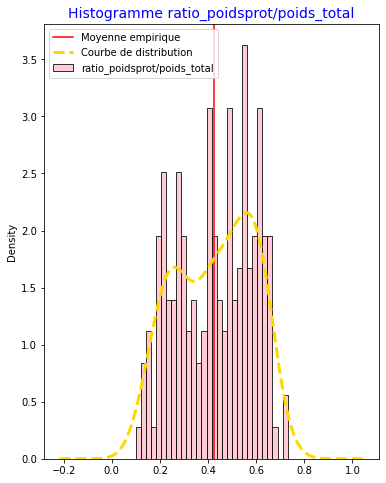

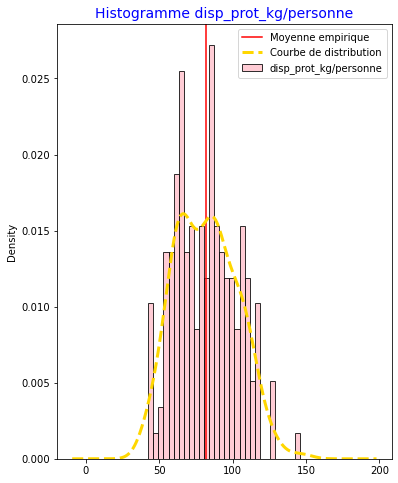

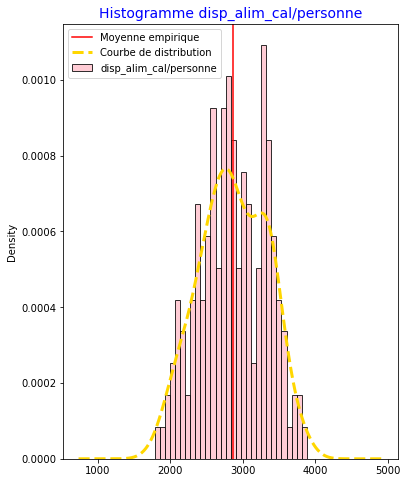

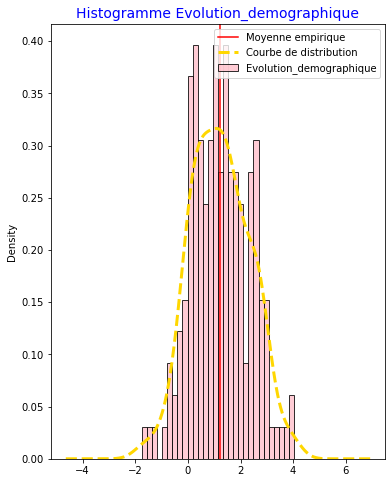

In [48]:
# Représenter les histogrammes et courbe de la loi normale pour le dataFrame data 
for features_adeq in features_test:
    xmin = data[features_adeq].min()
    xmax = data[features_adeq].max()
    #bins_range = np.arange(xmin, xmax, (xmax-xmin)/100)
    plt.figure(figsize(6,8))
    plt.title("Histogramme " + features_adeq, fontsize = 14, color = 'blue')
    
    data[features_adeq].plot(kind = 'hist', bins = 30, density = True, alpha = 0.8, edgecolor = 'black', color = 'pink')
    
    # Ajout de la moyenne empirique sur l'histogramme
    plt.axvline((np.mean(data[features_adeq])), color = 'red', label = 'Moyenne empirique')
    
    # Ajout de la courbe de distribution
    data[features_adeq].plot(kind ='kde', color = 'gold', label = 'Courbe de distribution', linestyle = 'dashed', lw = 3)
    
    #plt.xlabel(features_adeq, fontsize = 14)
    plt.legend()
plt.show()

## Tests de comparaison

In [49]:
fd1 = data[data["cluster2"] == 1]

In [50]:

for feature_cluster in fd1:
    print("\n\nNom de la variable :" + feature_cluster)
    
    # Calcul de la moyenne
    Moyenne = round(np.mean(fd1[feature_cluster]), 2)
    
    # Calcul de l'écart-type(std)empirique dans sa version non biaisée de l'échantillon
    Ecart_type = round(np.std(fd1[feature_cluster], ddof = 1), 2)
    
    # Calcul de la variance empirique (Var) dans sa version biaisé de l'échantillon
    Variance = round(np.var(fd1[feature_cluster], ddof = 1), 2)
    
    # Calcul de la Variance empirique dans sa version biaisée
    Variance_baise = round(np.var(fd1[feature_cluster]),2)
    
    # Test de Kolmogorov-Smirnov
    from scipy.stats import norm,ks_2samp,kstest,bartlett,ttest_ind
    Kolmogorov_Smirnov = ks_2samp(fd1[feature_cluster], list(np.random.normal(Moyenne, Ecart_type, 1000)))
    
    print("Moyenne :", Moyenne)
    print("Ecart-type :", Ecart_type)
    print("Variance :", Variance)
    print("Variance biaisée :", Variance_baise)
    print("Test d’adéquation de Kolmogorov–Smirnov:", Kolmogorov_Smirnov )



Nom de la variable :code_pays
Moyenne : 122.22
Ecart-type : 73.22
Variance : 5360.61
Variance biaisée : 5317.72
Test d’adéquation de Kolmogorov–Smirnov: KstestResult(statistic=0.069, pvalue=0.6457961995707108)


Nom de la variable :Zone


TypeError: Could not convert AfghanistanAlgérieAngolaAntigua-et-BarbudaArgentineArménieAustralieAzerbaïdjanBahamasBangladeshBarbadeBelizeBéninBolivie Bosnie-HerzégovineBotswanaBulgarieBurkina FasoCabo VerdeCambodgeCamerounChiliChypreColombieCongoCosta RicaCôte d'IvoireCubaDjiboutiDominiqueEgypteEl SalvadorEquateurEswatiniEthiopieRussieFidjiGabonGambieGéorgieGhanaGrenadeGuatemalaGuinéeGuinée-BissauGuyanaHaïtiHondurasÎles SalomonIndeIndonésieIran IraqJamaïqueJordanieKazakhstanKenyaKirghizistanKiribatiLesothoLibanLibériaMacédoine du NordMadagascarMalaisieMalawiMaldivesMaliMarocMauriceMauritanieMongolieMozambiqueMyanmarNamibieNépalNicaraguaNigerNigériaNouvelle-CalédonieNouvelle-ZélandeOmanOugandaOuzbékistanPakistanPanamaParaguayPérouPhilippinesPolynésie françaiseRépublique centrafricaineRépublique de CoréeRépublique de MoldovaRépublique démocratique populaire laoRépublique dominicaineRépublique populaire démocratique de CoréeRépublique-Unie de TanzanieRwandaSainte-LucieSaint-Kitts-et-NevisSaint-Vincent-et-les GrenadinesSamoaSao Tomé-et-PrincipeSénégalSerbieSierra LeoneSoudanSri LankaSurinameTadjikistanTchadThaïlandeTimor-LesteTogoTrinité-et-TobagoTunisieTurkménistanTurquieUkraineUruguayVanuatuVenezuela (République bolivarienne du)YémenZambieZimbabwe to numeric

In [ ]:
for feature_cluster in fd3:
    print("\n\nNom de la variable :" + feature_cluster)
    
    # Calcul de la moyenne
    Moyenne = round(np.mean(fd3[feature_cluster]), 2)
    
    # Calcul de l'écart-type(std)empirique dans sa version non biaisée de l'échantillon
    Ecart_type = round(np.std(fd3[feature_cluster], ddof = 1), 2)
    
    # Calcul de la variance empirique (Var) dans sa version biaisé de l'échantillon
    Variance = round(np.var(fd3[feature_cluster], ddof = 1), 2)
    
    # Calcul de la Variance empirique dans sa version biaisée
    Variance_baise = round(np.var(fd3[feature_cluster]),2)
    
    # Test de Kolmogorov-Smirnov
    from scipy.stats import norm,ks_2samp,kstest,bartlett,ttest_ind
    Kolmogorov_Smirnov = ks_2samp(fd3[feature_cluster], list(np.random.normal(Moyenne, Ecart_type, 1000)))
    
    print("Moyenne :", Moyenne)
    print("Ecart-type :", Ecart_type)
    print("Variance :", Variance)
    print("Variance biaisée :", Variance_baise)
    print("Test d’adéquation de Kolmogorov–Smirnov:", Kolmogorov_Smirnov )

In [ ]:
fd2 = data[data["cluster2"] == 2]
fd3 = data[data["cluster2"] == 3]

In [ ]:
features_gauss = ['ratio_poidsprot/poids_total',
                 'disp_alim_cal/personne','disp_prot_kg/personne',
                 'Evolution_demographique'
                 ]
                                  
                                   

gauss_fd2 = data[data["cluster2"] == 2]
gauss_fd3 = data[data["cluster2"] == 3]

for features_g in features_gauss:
    print("\n\nVariable : " + features_g)
    print(" \nTest d'égalité des variances" )
    print( bartlett(gauss_fd2[features_g],gauss_fd3[features_g]))
    print(" \nTest d'égalité des moyennes cf. Student" )
    print( ttest_ind(gauss_fd2[features_g],gauss_fd3[features_g], equal_var=True))
    